In [25]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df_index = pd.read_csv('economic_index.csv')

In [27]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2015,1,2.3,5.4,1500
1,2015,2,2.1,5.2,1520
2,2015,3,2.0,4.8,1530
3,2015,4,3.2,4.6,1550
4,2015,5,3.5,4.4,1570


In [28]:
## drop unnecessary columns
df_index.drop(columns = ['year','month'],axis = 1,inplace = True)

In [29]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.3,5.4,1500
1,2.1,5.2,1520
2,2.0,4.8,1530
3,3.2,4.6,1550
4,3.5,4.4,1570


In [30]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

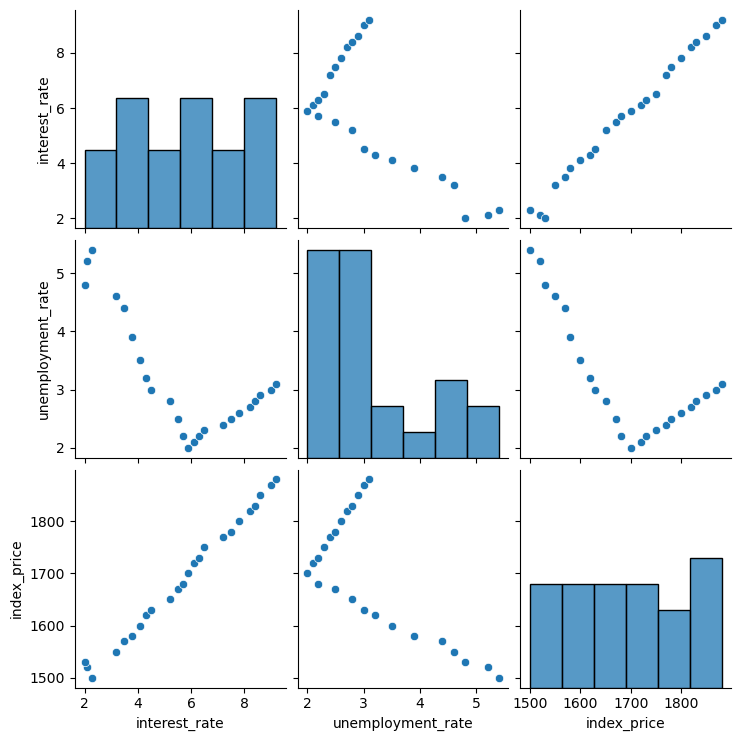

In [31]:
## lets do some visualization

sns.pairplot(df_index)
plt.show()

In [32]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.727120,0.995441
unemployment_rate,-0.727120,1.000000,-0.715707
index_price,0.995441,-0.715707,1.000000


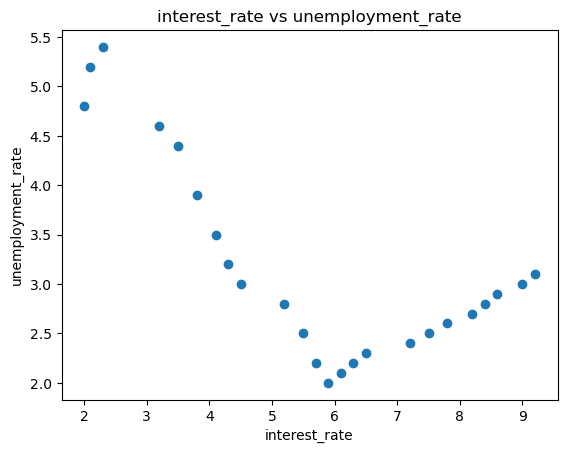

In [33]:
 # Visualize the datapoint more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.title('interest_rate vs unemployment_rate')
plt.show()

In [34]:
## independent and dependent variables
X = df_index[['interest_rate','unemployment_rate']] #(X = df_index.iloc[:,:-1])
y = df_index['index_price'] #(y = df_index.iloc[:,-1])

In [35]:
X.head()

,interest_rate,unemployment_rate
0,2.3,5.4
1,2.1,5.2
2,2.0,4.8
3,3.2,4.6
4,3.5,4.4


In [36]:
y.head()

0    1500
1    1520
2    1530
3    1550
4    1570
Name: index_price, dtype: int64

In [37]:
# train test split
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


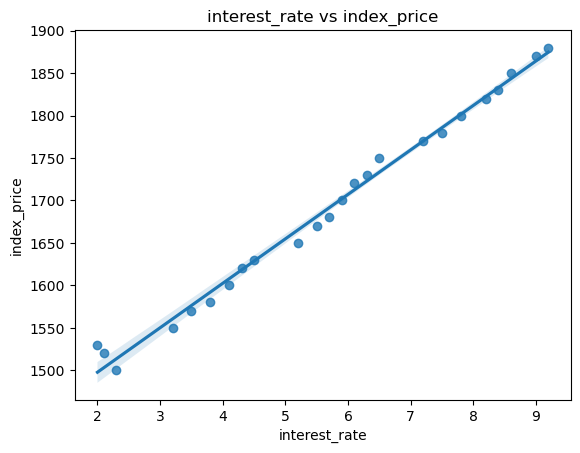

In [39]:
# seaborn plot

sns.regplot(x = 'interest_rate',y = 'index_price',data = df_index)
plt.title('interest_rate vs index_price')
plt.xlabel('interest_rate')
plt.ylabel('index_price')
plt.show()

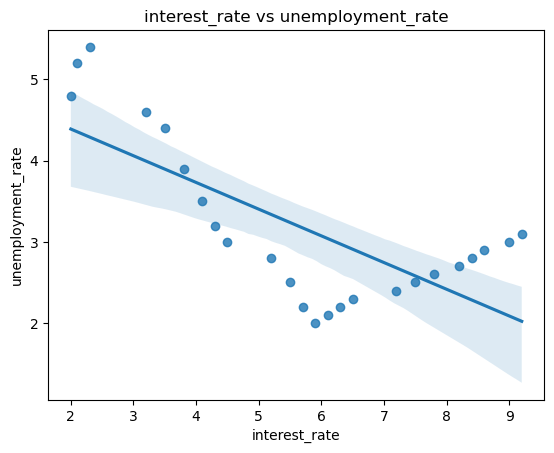

In [40]:
# seaborn plot

sns.regplot(x = 'interest_rate',y = 'unemployment_rate',data = df_index)
plt.title('interest_rate vs unemployment_rate')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

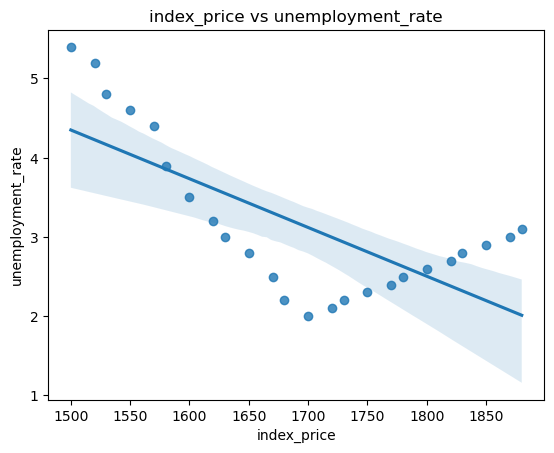

In [41]:
# seaborn plot

sns.regplot(x = 'index_price',y = 'unemployment_rate',data = df_index)
plt.title('index_price vs unemployment_rate')
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')
plt.show()

In [42]:
# standardize the data

from sklearn.preprocessing import StandardScaler

In [43]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [45]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv = 5)

In [48]:
np.mean(validation_score)

np.float64(-138.08609649290162)

In [49]:
## predicting the test data

y_pred = regression.predict(X_test)

In [50]:
y_pred

array([1630.29465345, 1770.5321301 , 1520.2769549 , 1802.43727107,
       1691.43640922, 1666.55368347])

In [51]:
## Performance Metric

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
mse = mean_squared_error(y_test,y_pred) ## mean squared error
mae = mean_absolute_error(y_test,y_pred) ## mean absolute error 
rmse = np.sqrt(mse) ## root mean squared error
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 137.0468442524517
Mean Absolute Error: 8.588517035416771
Root Mean Squared Error: 11.706700826981601


In [53]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred) ## r2 score 
print("R2 Score:",score) ## r2 score

R2 Score: 0.9857941652948797


In [54]:
#display adjusted r2 score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) ## adjusted r2 score

0.9763236088247995

### Assumptions

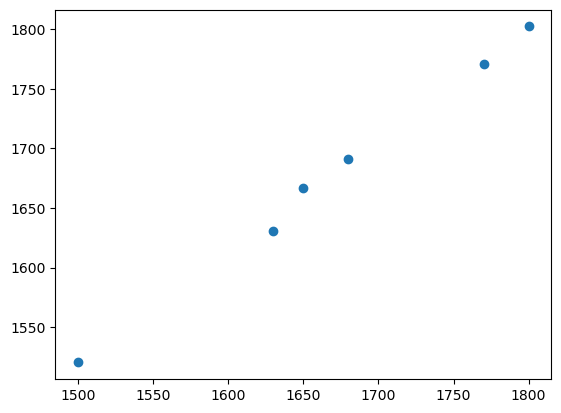

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
residuals = y_test - y_pred
print(residuals)

8     -0.294653
16    -0.532130
0    -20.276955
18    -2.437271
11   -11.436409
9    -16.553683
Name: index_price, dtype: float64


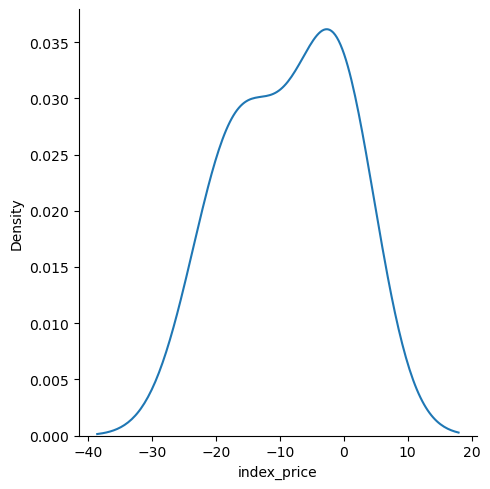

In [58]:
# plotting the residuals
sns.displot(residuals,kind='kde')


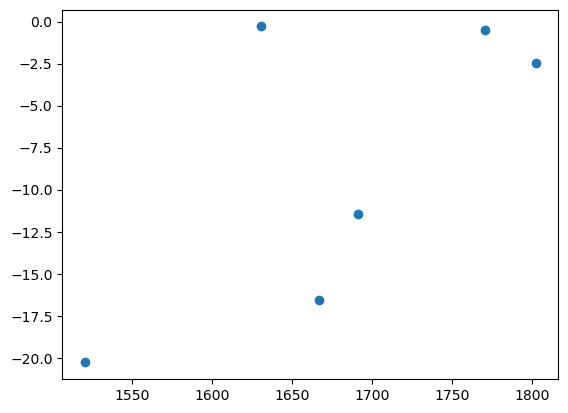

In [59]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [61]:
%pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.8 MB/s eta 0:00:00:00:0100:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


In [62]:
## OLS Linear Regression

import statsmodels.api as sm

In [63]:
model = sm.OLS(y_train,X_train).fit() ## OLS is used to fit the model

In [64]:
predictions = model.predict(X_test) ## predict the test data
print(predictions) ## summary of the model

[ -68.03867988   72.19879677 -178.05637844  104.10393774   -6.89692411
  -31.77964987]


In [65]:
print(model.summary()) ## summary of the model

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.119
Method:                 Least Squares   F-statistic:                            0.03936
Date:                Tue, 13 May 2025   Prob (F-statistic):                       0.961
Time:                        10:54:39   Log-Likelihood:                         -159.41
No. Observations:                  18   AIC:                                      322.8
Df Residuals:                      16   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/mukulvyas/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [66]:
print(regression.coef_)

[120.64739221   2.13099827]
